In [3]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [4]:
example_id = "20190611_1628_icab_hdr_R"

In [5]:
meta = pd.read_csv("/hps/software/users/birney/saul/repos/medaka_behaviour_pilot/samplesheets/samplesheet_tracking.csv")
meta = meta.loc[meta["id"] == example_id, ["id", "adj_top_of", "adj_right_of", "of_start"]]
of_start = meta["of_start"].values[0]
adj_right = meta["adj_right_of"].values[0]
adj_top = meta["adj_top_of"].values[0]
meta

,id,adj_top_of,adj_right_of,of_start
4,20190611_1628_icab_hdr_R,0,7,2703


In [6]:
cap = cv.VideoCapture("/nfs/research/birney/users/saul/raw_data/behavioural_project/pilot/{}.avi".format(example_id))

# Fig 1B

In [12]:
length = 100
circle_size = 2
colors = dict(
    red = (0, 0, 255), # BGR red
    orange = (0, 140, 255), # BGR orange
)
cap.set(cv.CAP_PROP_POS_FRAMES, of_start + length)
ret, frame = cap.read()
# R videos are flipped
frame = cv.rotate(frame, cv.ROTATE_180)
w = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
mid_x = round(((w - 1) / 2) + adj_right)
mid_y = round(((h - 1) / 2) + adj_top)

for q in range(1, 5):
    if q in [1, 2]:
        y_offset = 0
    elif q in [3, 4]:
        y_offset = mid_y
    else:
        raise AssertionError
    
    if q in [2, 3]:
        x_offset = 0
    elif q in [1, 4]:
        x_offset = mid_x
    else:
        raise AssertionError
        
    X = pd.read_csv(
        "/hps/nobackup/birney/users/saul/tmp/{}_of_q{}_traj_with_identities.csv.gz".format(example_id, q)
    ).loc[range(length), ["ref_x", "ref_y", "test_x", "test_y"]].to_numpy()
    X_ref = (X[:, 0:2] + np.array([x_offset, y_offset]))
    X_ref = X_ref[~np.isnan(X_ref).any(axis = 1)].astype(int)
    X_test = (X[:, 2:4] + np.array([x_offset, y_offset]))
    X_test = X_test[~np.isnan(X_test).any(axis = 1)].astype(int)
    for i in range(X_ref.shape[0]):
        frame = cv.circle(
            frame, X_ref[i,], circle_size, colors["red"], -1
        )
    for i in range(X_test.shape[0]):
        frame = cv.circle(
            frame, X_test[i,], circle_size, colors["orange"], -1
        )
    

True

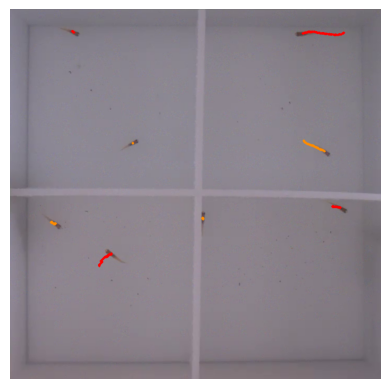

In [13]:
frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis("off")
cv.imwrite("fig1b.png", frame)

# Fig 1C

In [18]:
length = 110 * 30
circle_size = 2
colors = dict(
    red = (0, 0, 255), # BGR red
    orange = (0, 140, 255), # BGR orange
)
cap.set(cv.CAP_PROP_POS_FRAMES, of_start + length)
w = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
mid_x = round(((w - 1) / 2) + adj_right)
mid_y = round(((h - 1) / 2) + adj_top)
frame = np.zeros([w, h, 3], dtype = "uint8")
frame[:, :, :] = 255

for q in range(1, 5):    
    if q in [1, 2]:
        y_offset = 0
    elif q in [3, 4]:
        y_offset = mid_y
    else:
        raise AssertionError
    
    if q in [2, 3]:
        x_offset = 0
    elif q in [1, 4]:
        x_offset = mid_x
    else:
        raise AssertionError
        
    X = pd.read_csv(
        "/hps/nobackup/birney/users/saul/tmp/{}_of_q{}_traj_with_identities.csv.gz".format(example_id, q)
    ).loc[range(length), ["ref_x", "ref_y", "test_x", "test_y"]].to_numpy()
    X_ref = (X[:, 0:2] + np.array([x_offset, y_offset]))
    X_ref = X_ref[~np.isnan(X_ref).any(axis = 1)].astype(int)
    X_test = (X[:, 2:4] + np.array([x_offset, y_offset]))
    X_test = X_test[~np.isnan(X_test).any(axis = 1)].astype(int)
    for i in range(X_ref.shape[0]):
        frame = cv.circle(
            frame, X_ref[i,], circle_size, colors["red"], -1
        )
    for i in range(X_test.shape[0]):
        frame = cv.circle(
            frame, X_test[i,], circle_size, colors["orange"], -1
        )
    

True

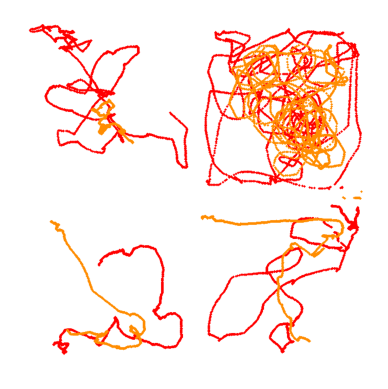

In [19]:
frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis("off")
cv.imwrite("fig1c.png", frame)